In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_catalog import QiskitServerless, QiskitFunction
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.passes import SabreLayout, SabreSwap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import matplotlib.pyplot as plt
import numpy as np
import time

## Creating a Star-Oriented GHZ Circuit

Modified from Qiskit's documentation. It's a star to make SABREs life difficult :)

In [2]:
# set seed for reproducibility
seed = 42
num_qubits = 50
 
# Create GHZ circuit
qc = QuantumCircuit(num_qubits)
qc.h(0)
for i in range(1, num_qubits):
    qc.cx(0, i)
 
qc.measure_all()

Original Ops: OrderedDict([('h', 1), ('swap', 1), ('cx', 1)])
Native Ops: OrderedDict([('r', 6), ('cz', 1)])


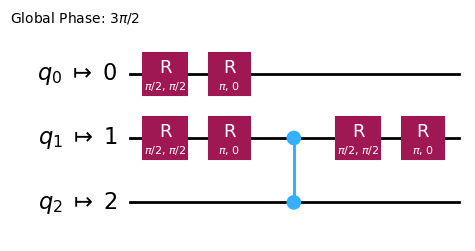

In [6]:
from qiskit import QuantumCircuit, transpile

# 1. Your high-level circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.swap(0, 2)  # SWAP is rarely a native gate
qc.cx(0, 1)

# Target Native Gates
native_gates = ['r', 'rz', 'cz'] 

# Transpilation (Compiling to a specific hardware configuration and gate set) 
# optimization_level=3 tries hardest to reduce gate count
# We will want to change this function to minimise bitflip noise in the end
transpiled_qc = transpile(qc, basis_gates=native_gates, optimization_level=3)

print("Original Ops:", qc.count_ops())
print("Native Ops:", transpiled_qc.count_ops())
transpiled_qc.draw("mpl")